# How to Create Insight from Research Result

## Casestudy : Predicting kenaf seed variety Using Machine Learning

Kenaf has gained commercial  interest  because  of  the  search  for  an  alternative   to   the   consumption   of   wood-based   products  which  has  resulted  in  a  decrease  in  forest  resources. Click [here](https://www.researchgate.net/publication/338031199_The_physical_properties_and_strength_characteristics_of_kenaf_plants) to read about kenaf

## Data Description 
The dataset consists of 400 obseravtions and 6 variables (5 features and 1 label). Each row in dataset represents a kenaf seed; each column contains kenaf seed attributes:

* variety_name
* length
* width
* thickness
* mass
* variety (0 - Ifeken 700, 1 - Ifeken D1 400, 2 - Cuba 108, 3 - Ifeken 400)


##Approach

We will import a dataset, explore the data, build models, examine the model performance, deploy the model, and make an inference with the best model. We will use Python’s NumPy, Pandas, and Scikit-Learn libraries. Classification models such as Logistic Regression, Random Forest, Naive Bayes, K-Nearest Neighbor, Stochastic Gradient Descent, Extreme Gradient Boosting, Decision Tree and Support Vector Machine will predict kenaf seed variety. Furthermore, we will display the accuracy of each model built.
I used google colaboratory for this project because it is fast, and I don’t have to download Python and some packages on my computer. To start, let’s import some necessary libraries.

## Data Import and Preprocessing

First off, to use colaboratory (colab), we need to instal PyDrive, a wrapper library of google-api-python-client that simplifies many common Google Drive API tasks. 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Next, we authenticate the user, using the following lines of codes. After that, we will connect the link of the dataset with colab and import the necessary libraries for data exploration.

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
kenaf = drive.CreateFile({'id':'1lJ2be9mPI9VWdpg210Ir7scWFhFJNXVy'}) 
kenaf.GetContentFile('kenaf_seed_properties.xlsx')

In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


To check our dataset, we'll use the following lines of codes

In [ ]:
#Import Data

df = pd.read_excel('kenaf_seed_properties.xlsx')

df.head()

,variety_name,length,width,thickness,mass,variety
0,ifeken_700,4.76,3.90,2.31,0.025,0
1,ifeken_700,4.88,2.86,2.52,0.025,0
2,ifeken_700,4.89,3.10,2.32,0.032,0
3,ifeken_700,4.45,2.77,2.25,0.032,0
4,ifeken_700,4.60,3.47,2.47,0.027,0


We have six columns. However, we don’t need the variety_name parameter as 0 — Ifeken 700, 1 — Ifeken D1 400, 2 — Cuba 108, 3 — Ifeken 400 denotes the varieties. Another approach we could use is to create a dummy variable based on the variety_name. In machine learning, dummy variables often describe the individual variables in a one-hot encoding scheme. Thus, dummy variables are qualitative variables that can only take the value 0 or 1 to indicate the absence or presence of a specified condition or variety in this case. Conversely, we will work with the variety column as the target class and drop the variety_name column.

In [ ]:
df.drop(labels='variety_name', axis=1, inplace=True)

In [ ]:
#Display data type for each column
df.dtypes


length       float64
width        float64
thickness    float64
mass         float64
variety        int64
dtype: object

Although we have 400 rows of data, it is important to check if we have missing values just to ensure that our data is clean.

In [ ]:
#Check for Missing Values
df.isnull().any()


length       False
width        False
thickness    False
mass         False
variety      False
dtype: bool

In [ ]:
#Dimensions of our dataset
df.shape


(400, 5)

# Data Exploration

In [ ]:
#Summary for each variable
df.describe()

,length,width,thickness,mass,variety
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,5.070672,3.689020,2.634987,0.026943,1.500000
std,0.327358,0.640698,0.448551,0.005959,1.119434
min,4.090000,0.650000,1.860000,0.011000,0.000000
25%,4.860000,3.170000,2.420000,0.024000,0.750000
50%,5.090000,3.785000,2.570000,0.027000,1.500000
75%,5.340000,4.260000,2.682500,0.031000,2.250000
max,5.720000,4.978000,4.600000,0.042000,3.000000


For the descriptive analysis, we have 400 samples, and from the table, the average length, width, thickness, and mass of the seeds are 5.07 mm, 3.69 mm, 2.63 mm, and 0.03 g, respectively. Let’s jump to model development which is our focus. We will split our dataset into two (training and test sets), standardize them, and build our models.

In [ ]:
df['variety'].value_counts()

3    100
2    100
1    100
0    100
Name: variety, dtype: int64

To calculate the categorical mean of the parameters selected for each variety, we will group the data by variety and find the mean.

In [ ]:
df.groupby('variety').mean()

,length,width,thickness,mass
variety,,,,
0,4.87030,3.19310,2.36490,0.027240
1,5.10060,3.49870,2.63280,0.024720
2,5.24890,3.88040,2.95750,0.029470
3,5.06289,4.18388,2.58475,0.026343


## Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

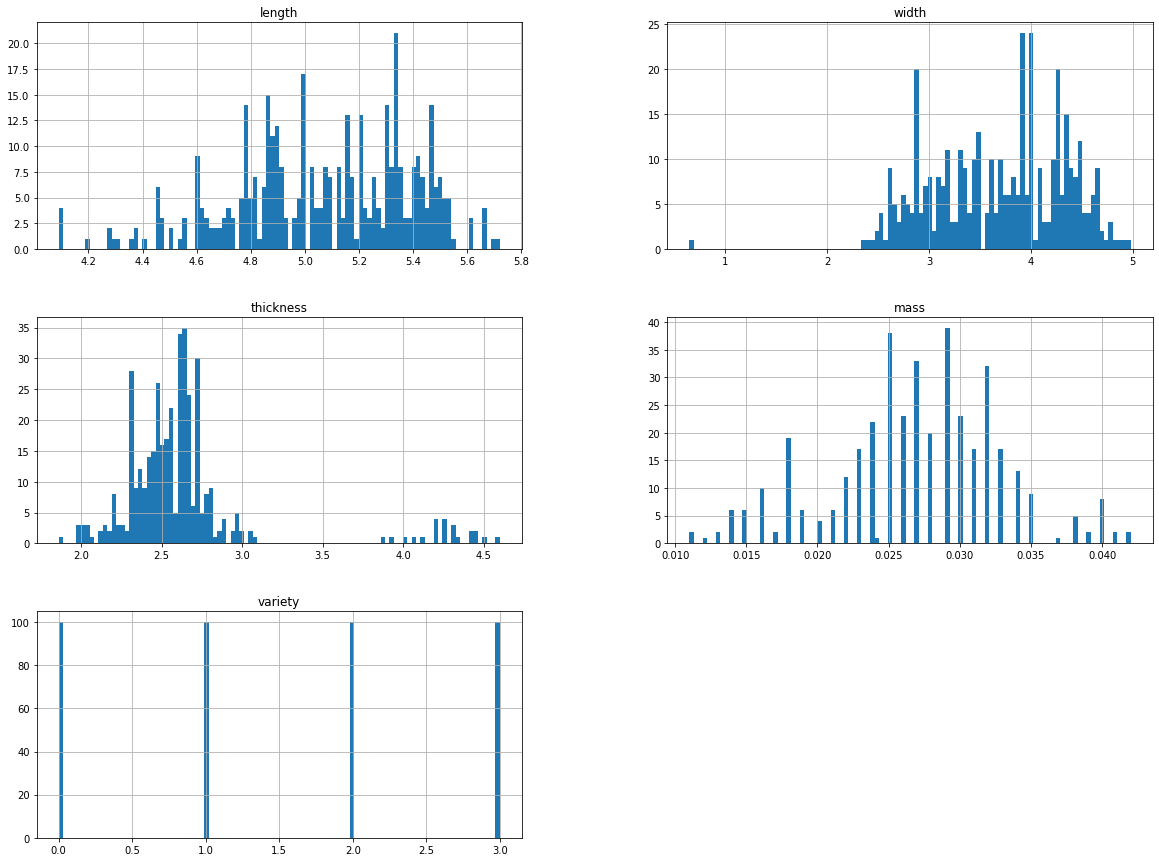

In [ ]:
#Histogram of numeric variables
num_bins = 100

df.hist(bins=num_bins, figsize=(20,15))

plt.show()


## Observations

Majority of the seed length falls between 4.6 mm to 5.5 mm. About eight seeds have their length greater than 5.6 mm. For the width size, one outlier was found with a width less than 1 mm. On the thickness chart, some seeds had unsual size greater than 3.5 mm (this seeds could belong to a category). Most of the seeds fall within the average mass. 

In [ ]:
df.columns

Index(['variety_name', 'length', 'width', 'thickness', 'mass', 'variety'], dtype='object')

In [ ]:
df.head()

,length,width,thickness,mass,variety
0,4.76,3.90,2.31,0.025,0
1,4.88,2.86,2.52,0.025,0
2,4.89,3.10,2.32,0.032,0
3,4.45,2.77,2.25,0.032,0
4,4.60,3.47,2.47,0.027,0


The correlation of the features and cluster of the seed varieties can be visualized using a pairplot as shown below. 

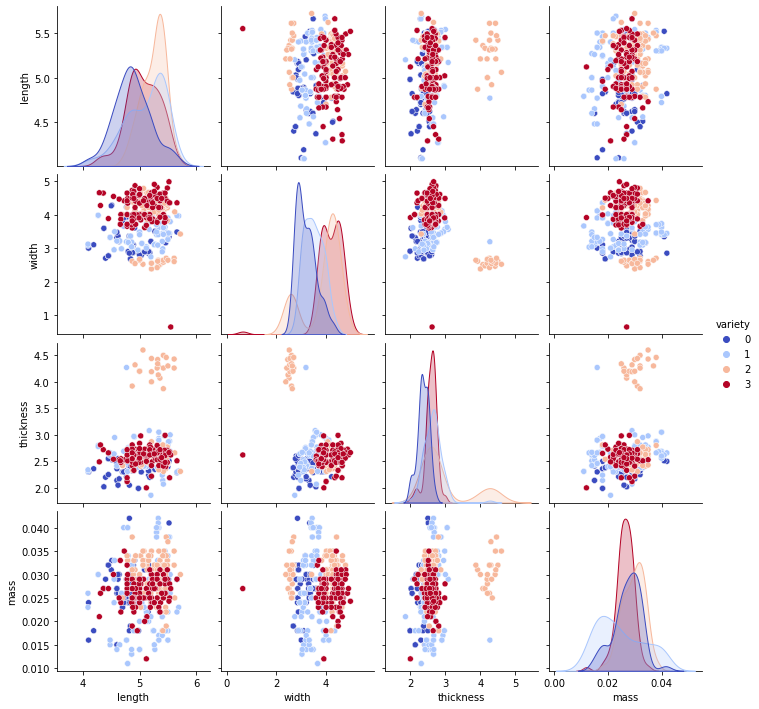

In [ ]:
sns.pairplot(data=df, hue='variety', palette='coolwarm')

Recall that variety (0 - Ifeken 700, 1 - Ifeken D1 400, 2 - Cuba 108, 3 - Ifeken 400). Here we can see that in the width column, the outlier identified earlier belongs to the Ifeken 400 variety.

#Model Development

We will split our dataset into two, training and test sets


In [ ]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split


x = df.loc[:, df.columns != 'variety']
y = df.loc[:, df.columns == 'variety']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

## Model Selection

##Naive Bayes

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

### Logistic Regression Model

In [ ]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Random Forest

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Support Vector Machine

In [ ]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=35)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

#K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Naive Bayes Accuracy: \t\t{:.3f}'.format(accuracy_score(y_test, nb.predict(x_test))))
print('Logistic regression accuracy: \t{:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))
print('Random Forest Accuracy: \t{:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))
print('Support vector machine accuracy: \t{:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))
print('Stochastic Gradient Descent accuracy: \t{:.3f}'.format(accuracy_score(y_test, sgd.predict(x_test))))
print('Decision Tree accuracy: \t{:.3f}'.format(accuracy_score(y_test, dtree.predict(x_test))))
print('K-Nearest Neighbors accuracy: \t{:.3f}'.format(accuracy_score(y_test, knn.predict(x_test))))
print('Extreme Gradient Boosting accuracy: \t{:.3f}'.format(accuracy_score(y_test, xgb.predict(x_test))))

Naive Bayes Accuracy: 		0.787
Logistic regression accuracy: 	0.688
Random Forest Accuracy: 	0.887
Support vector machine accuracy: 	0.800
Stochastic Gradient Descent accuracy: 	0.537
Decision Tree accuracy: 	0.675
K-Nearest Neighbors accuracy: 	0.812
Extreme Gradient Boosting accuracy: 	0.875


Out of the seven most commonly used models, Random Forest, Support Vector Machine, K-Nearest Neighnor, and Extreme Gradient Boosting have accuracy greater or equal to 80%. However, the best model to deploy is Random Forest.

#Precision, Recall, and Confusion Matrix for Random Forest

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.82      1.00      0.90        18
           2       0.88      0.78      0.82        18
           3       0.84      0.89      0.86        18

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.90      0.89      0.89        80



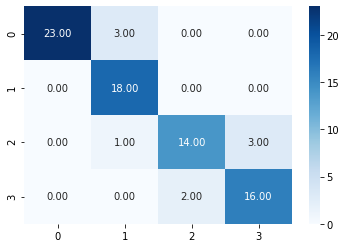

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test, rf.predict(x_test)))

#Confusion Matrix for Random Forest
y_pred = rf.predict(x_test)

forest_cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f', cmap='Blues')

The Random Forest model was able to predict 71 correct answers out of 80 entries. The result of the model is excellent and can be deployed for predicting kenaf seed varieties.

We will test the Random Forest model with a new data different from the ones we have used and see what it will predict.

## Results & Conclusion

In [ ]:
# make a single prediction

from numpy import asarray

# Recall our features are length, width, thickness, mass
row = [0.53, 4.21, 2.11, 0.28]
row = asarray([row])

new_pred = rf.predict(row)


for ans in new_pred:
  if ans == 0:
    print('Predicted Class: %d' % new_pred[0] +' belongs to Ifeken 700 variety')
  elif ans == 1:
     print('Predicted Class: %d' % new_pred[0] +' belongs to Ifeken D1 400 variety')
  elif ans == 2:
     print('Predicted Class: %d' % new_pred[0] +' belongs to Cuba 108 variety')
  else:
     print('Predicted Class: %d' % new_pred[0] +' belongs to Ifeken 400 variety')

Predicted Class: 3 belongs to Ifeken 400 variety


#Conclusion

We have seen how you can develop a classification model and how you can check its performance. Random Forest gave a desirable result, and we deployed it to make an inference with new data. We approached the solution from the angle of academic research. However, machine learning has several applications.